In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import obspy
import pandas
from hydrophone_data_processing import load, useful_variables, plotting, signal_processing
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
class PrecisionDateFormatter(ticker.Formatter):
    """
    Extend the `matplotlib.ticker.Formatter` class to allow for millisecond
    precision when formatting a tick (in days since the epoch) with a
    `~datetime.datetime.strftime` format string.

    """

    def __init__(self, fmt, precision=3, tz=None):
        """
        Parameters
        ----------
        fmt : str
            `~datetime.datetime.strftime` format string.
        """
        from matplotlib.dates import num2date
        if tz is None:
            from matplotlib.dates import _get_rc_timezone
            tz = _get_rc_timezone()
        self.num2date = num2date
        self.fmt = fmt
        self.tz = tz
        self.precision = precision

    def __call__(self, x, pos=0):
        if x == 0:
            raise ValueError("DateFormatter found a value of x=0, which is "
                             "an illegal date; this usually occurs because "
                             "you have not informed the axis that it is "
                             "plotting dates, e.g., with ax.xaxis_date()")

        dt = self.num2date(x, self.tz)
        ms = dt.strftime("%f")[:self.precision]

        return dt.strftime(self.fmt).format(ms=ms)

    def set_tzinfo(self, tz):
        self.tz = tz
        

def plot_traces(stream, fig=None, ax=None):
    data = [tr.data for tr in stream]
    times = [tr.times('matplotlib') for tr in stream]
    if fig == None:
        fig, ax = plt.subplots(6, 1, figsize=(15, 15), sharex=True, sharey=True)
        color = 'black'
    else:
        color = 'red'
    n = 0
    for d, t in zip(data, times):
        ax[n].plot(t, d, color=color, linewidth=1)
        ax[n].set_xticks(t[::250])
        ax[n].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S.%f'))
        ax[n].set_ylabel('hydrophone {n}'.format(n=n+1))
        fig.tight_layout()
        n += 1
    
    return fig, ax

In [2]:
times = ['2019-05-21T07:44:43.613000Z',
'2019-05-21T07:44:06.043000Z',
'2019-05-21T07:38:59.981000Z',
'2019-05-21T07:51:53.199000Z',
'2019-05-21T08:13:02.569000Z',
'2019-05-21T08:20:35.557000Z',
'2019-05-21T08:31:18.593000Z',
'2019-05-21T08:36:56.497000Z',]

In [3]:
loc = useful_variables.make_hydrophone_data_paths(borehole='a', year=2019, julian_day=141)

In [4]:
stream = obspy.read(loc[0])
for l in loc[1:]:
    stream += obspy.read(l)
stream

6 Trace(s) in Stream:
7F.A00.01.GDH | 2019-05-21T00:00:04.958000Z - 2019-05-22T00:00:04.625000Z | 1000.0 Hz, 86399668 samples
7F.A00.02.GDH | 2019-05-21T00:00:02.689000Z - 2019-05-22T00:00:03.978000Z | 1000.0 Hz, 86401290 samples
7F.A00.03.GDH | 2019-05-21T00:00:00.991000Z - 2019-05-22T00:00:00.009000Z | 1000.0 Hz, 86399019 samples
7F.A00.04.GDH | 2019-05-21T00:00:00.295000Z - 2019-05-22T00:00:03.398000Z | 1000.0 Hz, 86403104 samples
7F.A00.05.GDH | 2019-05-21T00:00:00.964000Z - 2019-05-22T00:00:01.155000Z | 1000.0 Hz, 86400192 samples
7F.A00.06.GDH | 2019-05-21T00:00:01.824000Z - 2019-05-22T00:00:02.773000Z | 1000.0 Hz, 86400950 samples

In [5]:
def plot_raw_vs_50hz(eventtime, stream):
    # starttime = obspy.UTCDateTime(times[0]) - 0.25
    starttime = obspy.UTCDateTime(eventtime) - 0.25
    endtime = starttime + 0.75

    event = stream.copy().trim(starttime=starttime, endtime=endtime)
    fig, ax = plot_traces(event)

    event_50hz = event.copy().filter(type='highpass', freq=50, corners=1, zerophase=False)
    plot_traces(event_50hz, fig=fig, ax=ax)

(<Figure size 1500x1500 with 6 Axes>,
 array([<AxesSubplot:ylabel='hydrophone 1'>,
        <AxesSubplot:ylabel='hydrophone 2'>,
        <AxesSubplot:ylabel='hydrophone 3'>,
        <AxesSubplot:ylabel='hydrophone 4'>,
        <AxesSubplot:ylabel='hydrophone 5'>,
        <AxesSubplot:ylabel='hydrophone 6'>], dtype=object))

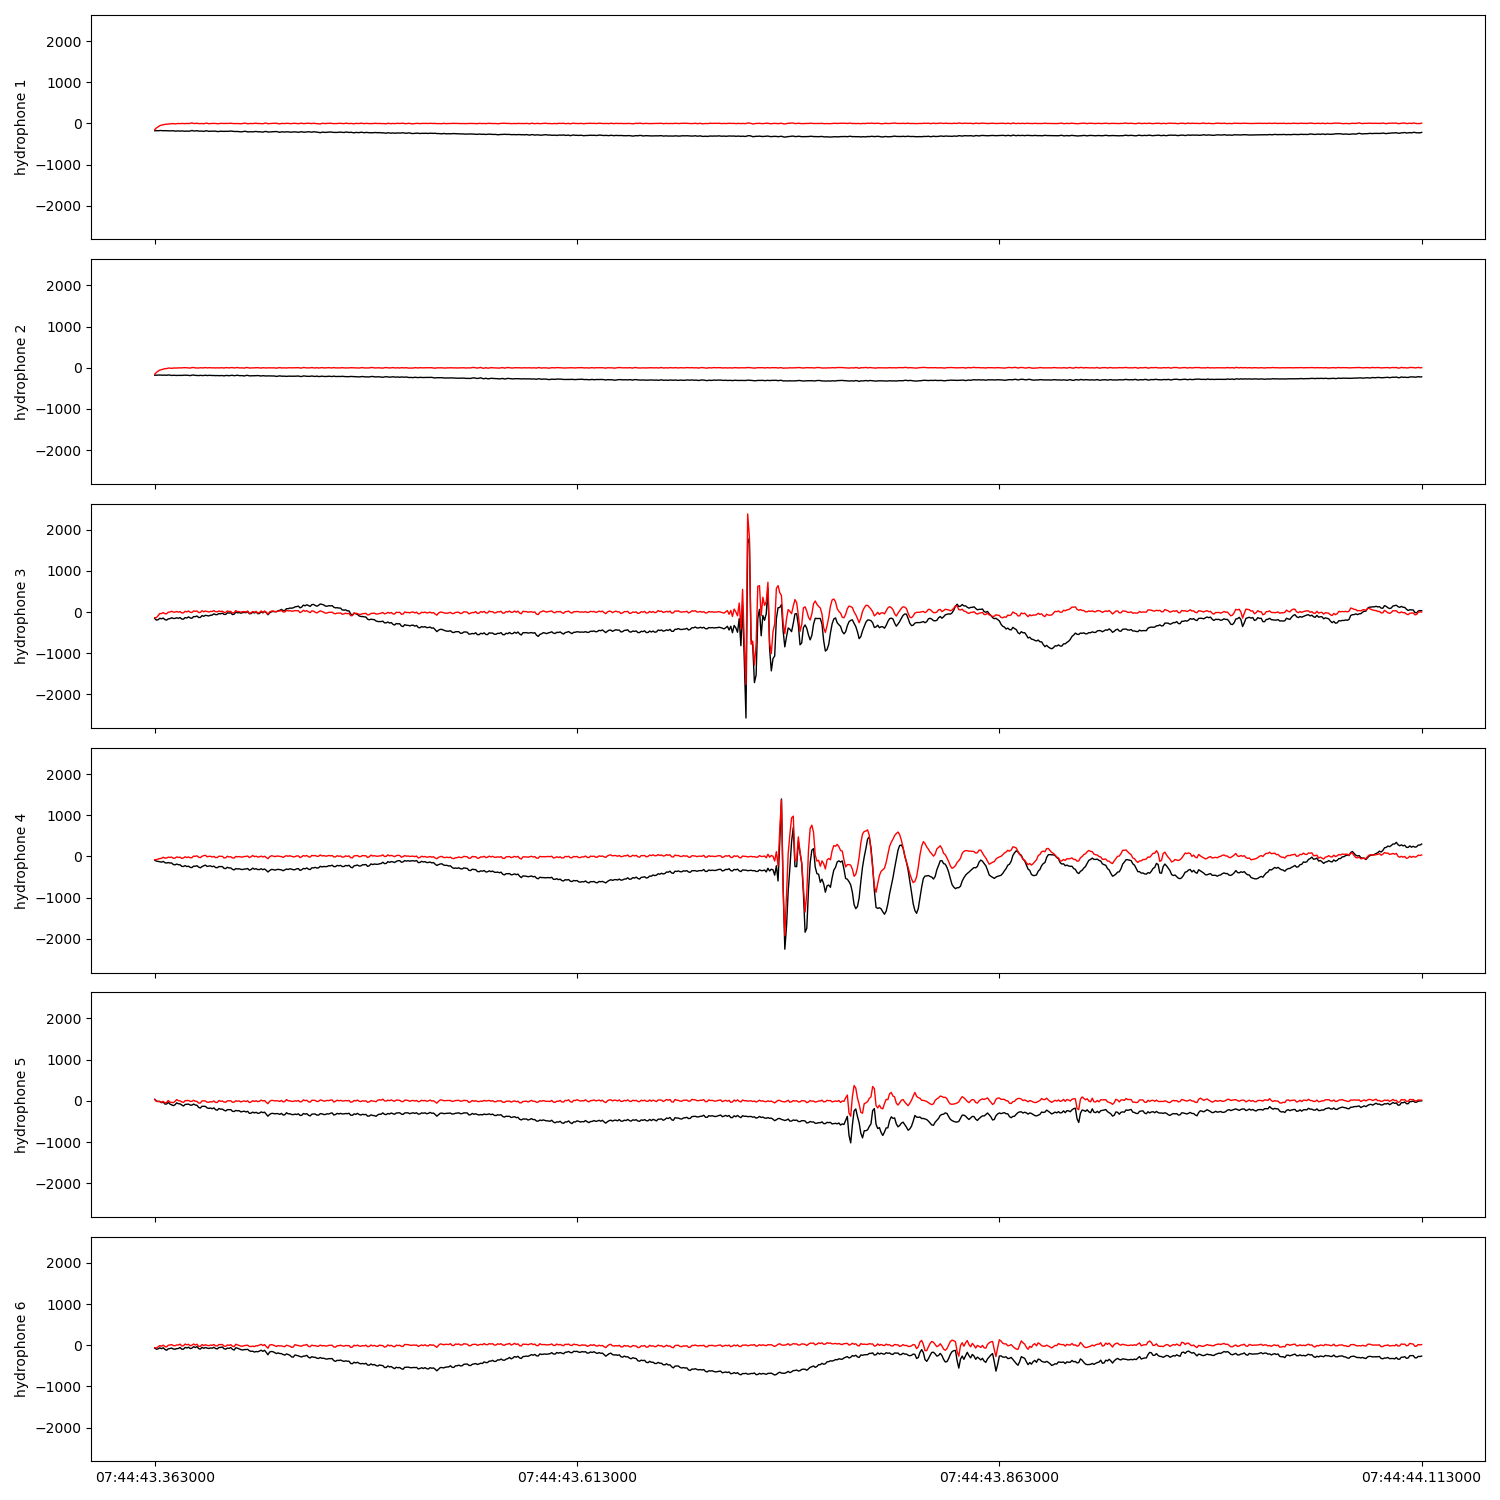

In [6]:
starttime = obspy.UTCDateTime(times[0]) - 0.25
endtime = starttime + 0.75

event1 = stream.copy().trim(starttime=starttime, endtime=endtime)
fig, ax = plot_traces(event1)

event1_50hz = event1.copy().filter(type='highpass', freq=50, corners=1, zerophase=False)
plot_traces(event1_50hz, fig=fig, ax=ax)

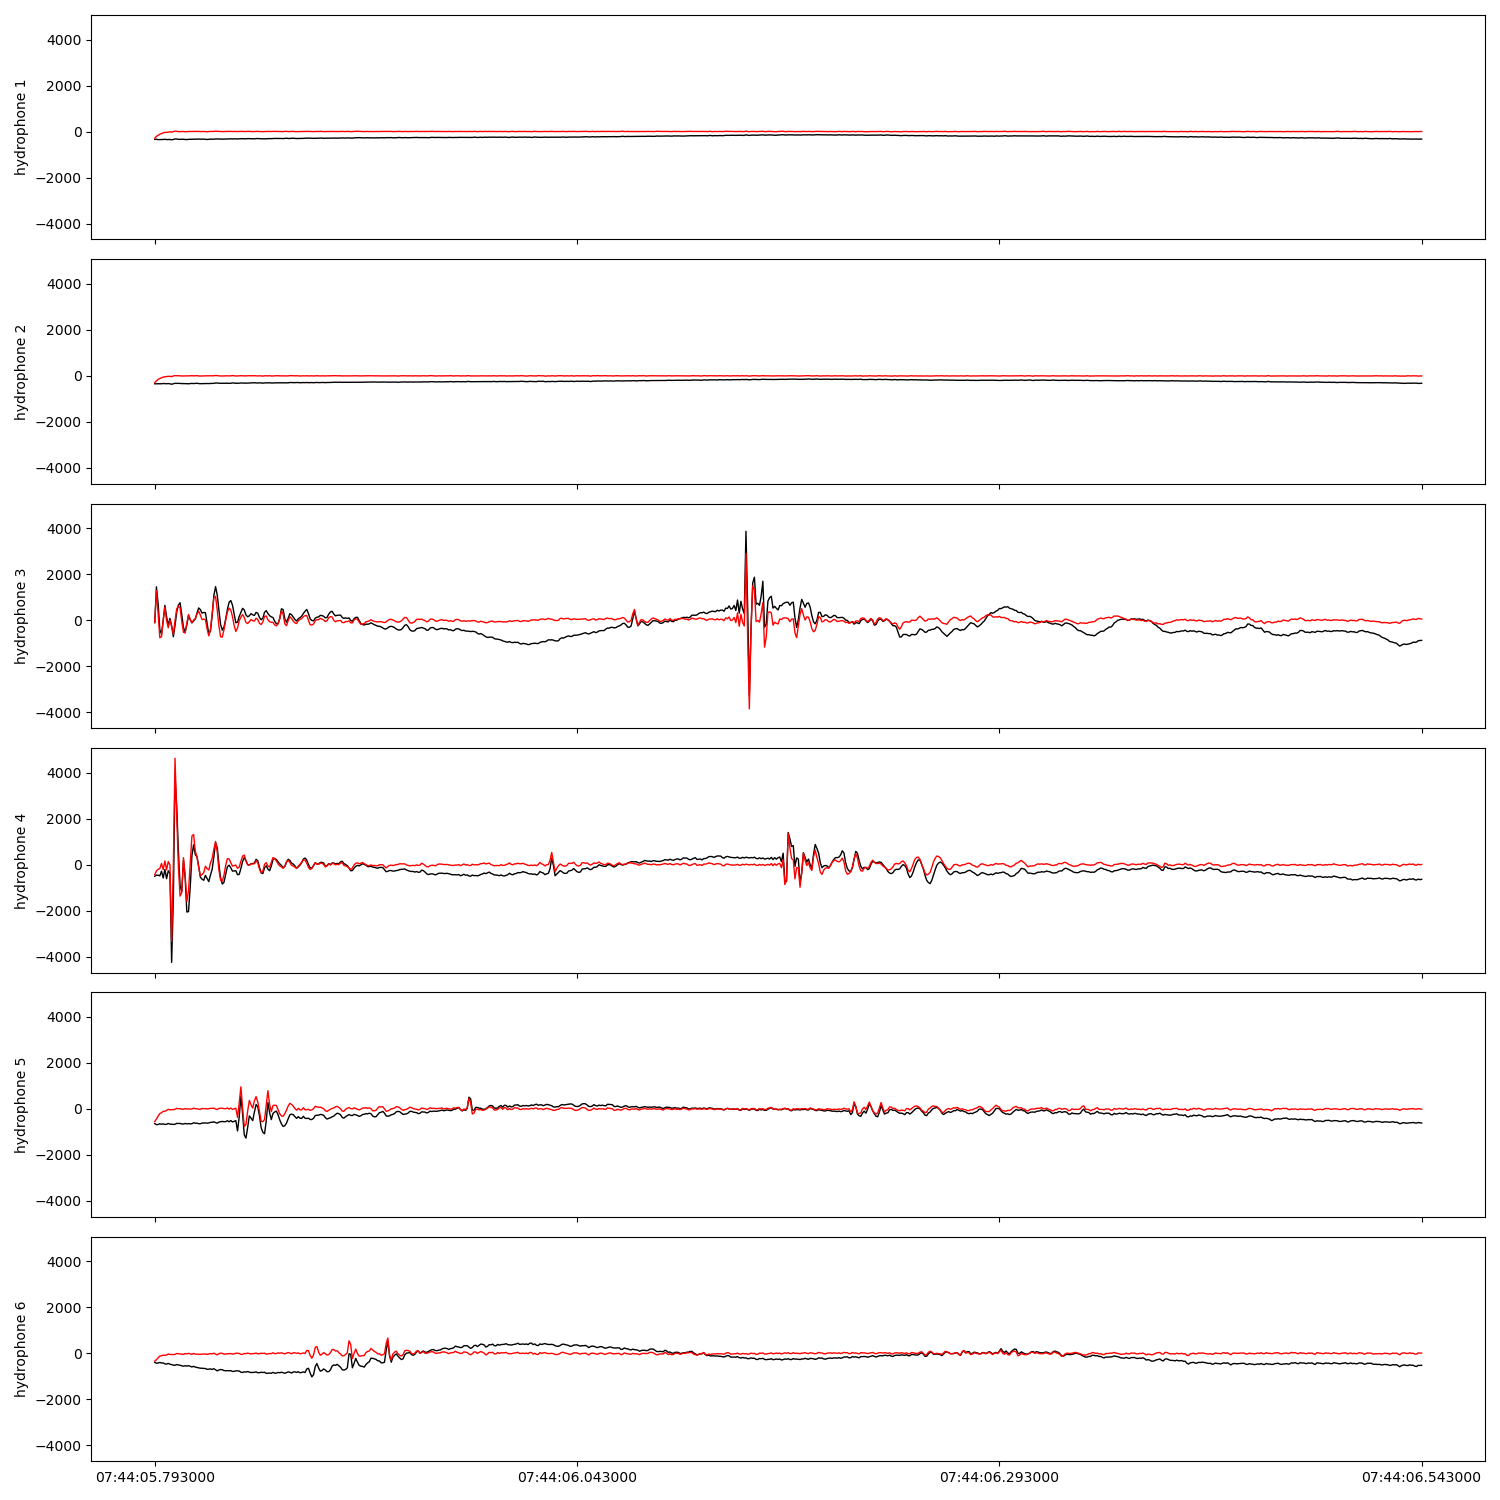

In [7]:
plot_raw_vs_50hz(eventtime=times[1], stream=stream)

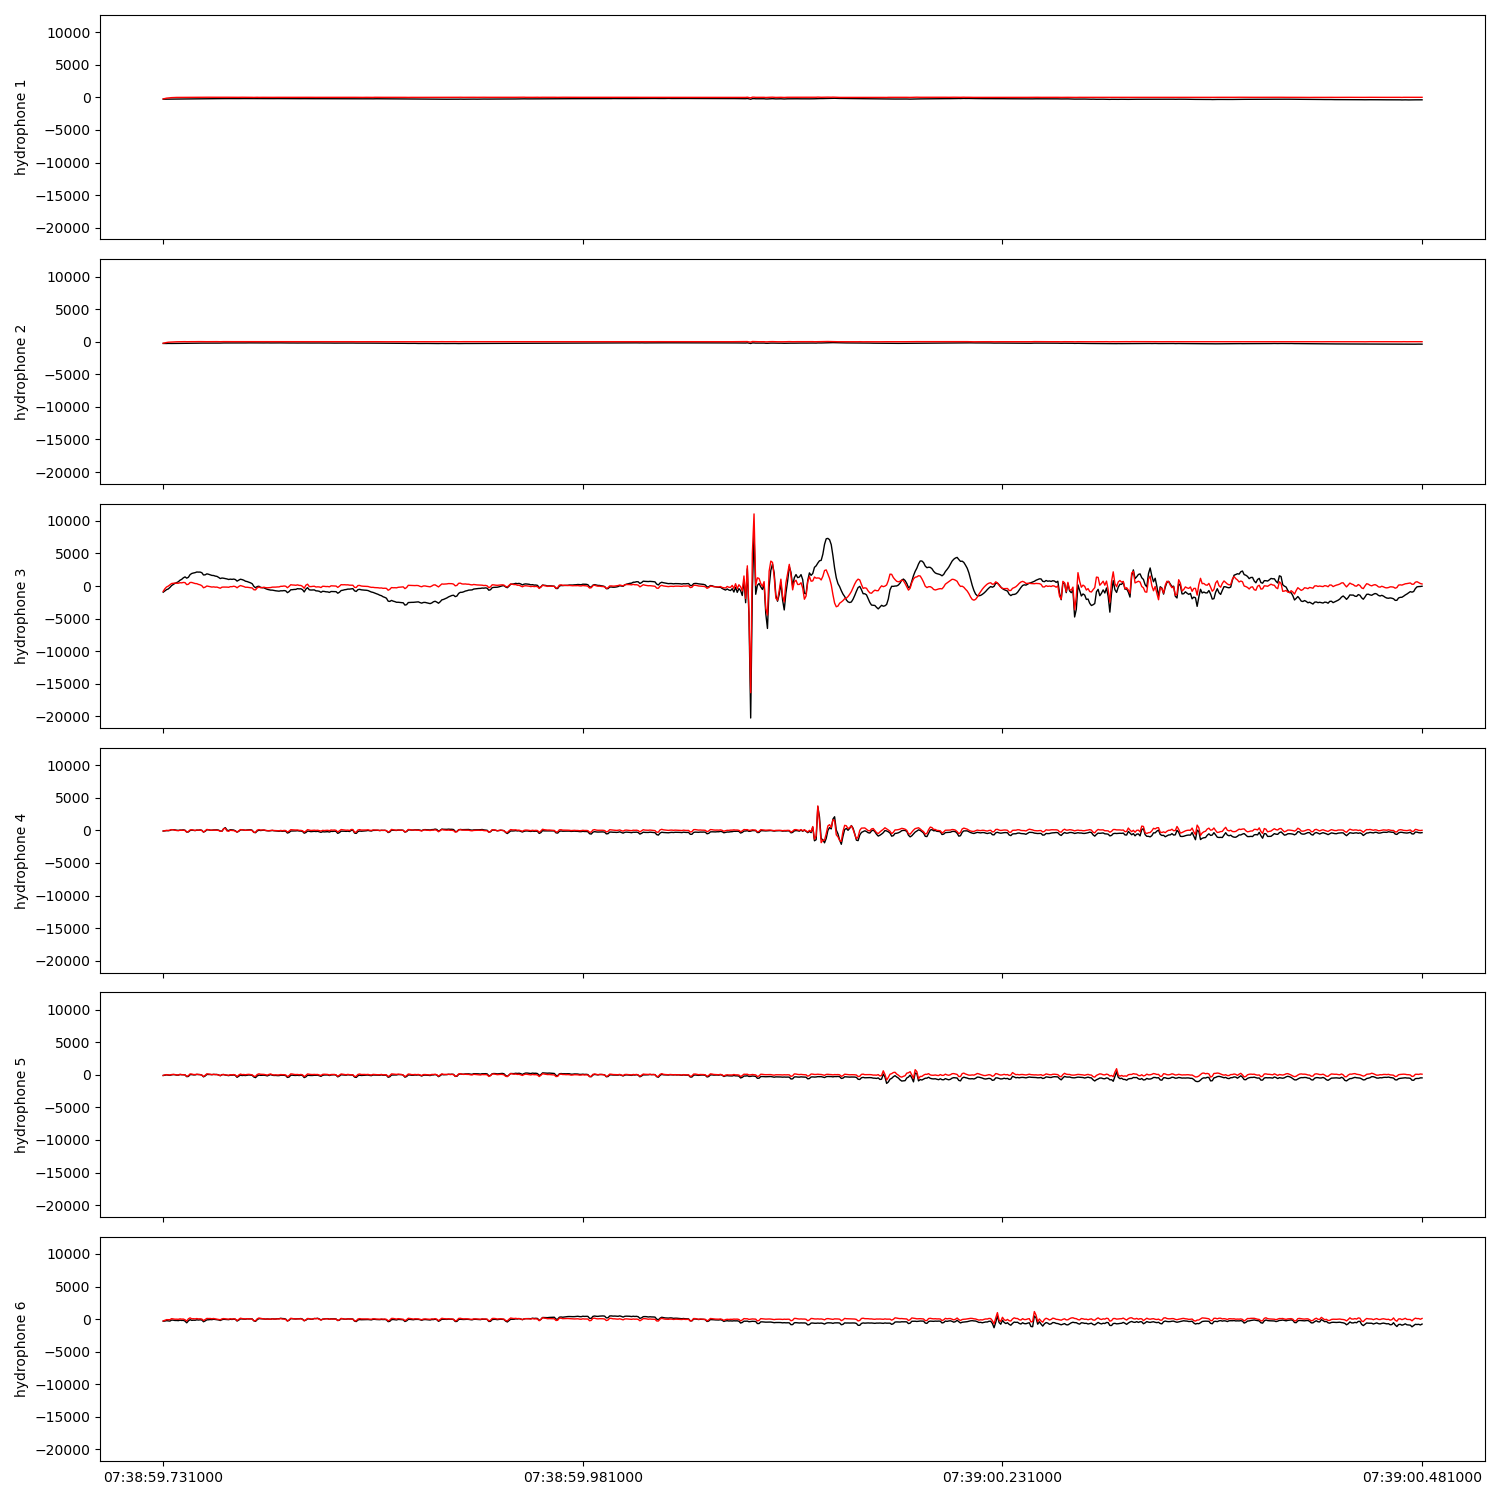

In [8]:
plot_raw_vs_50hz(eventtime=times[2], stream=stream)

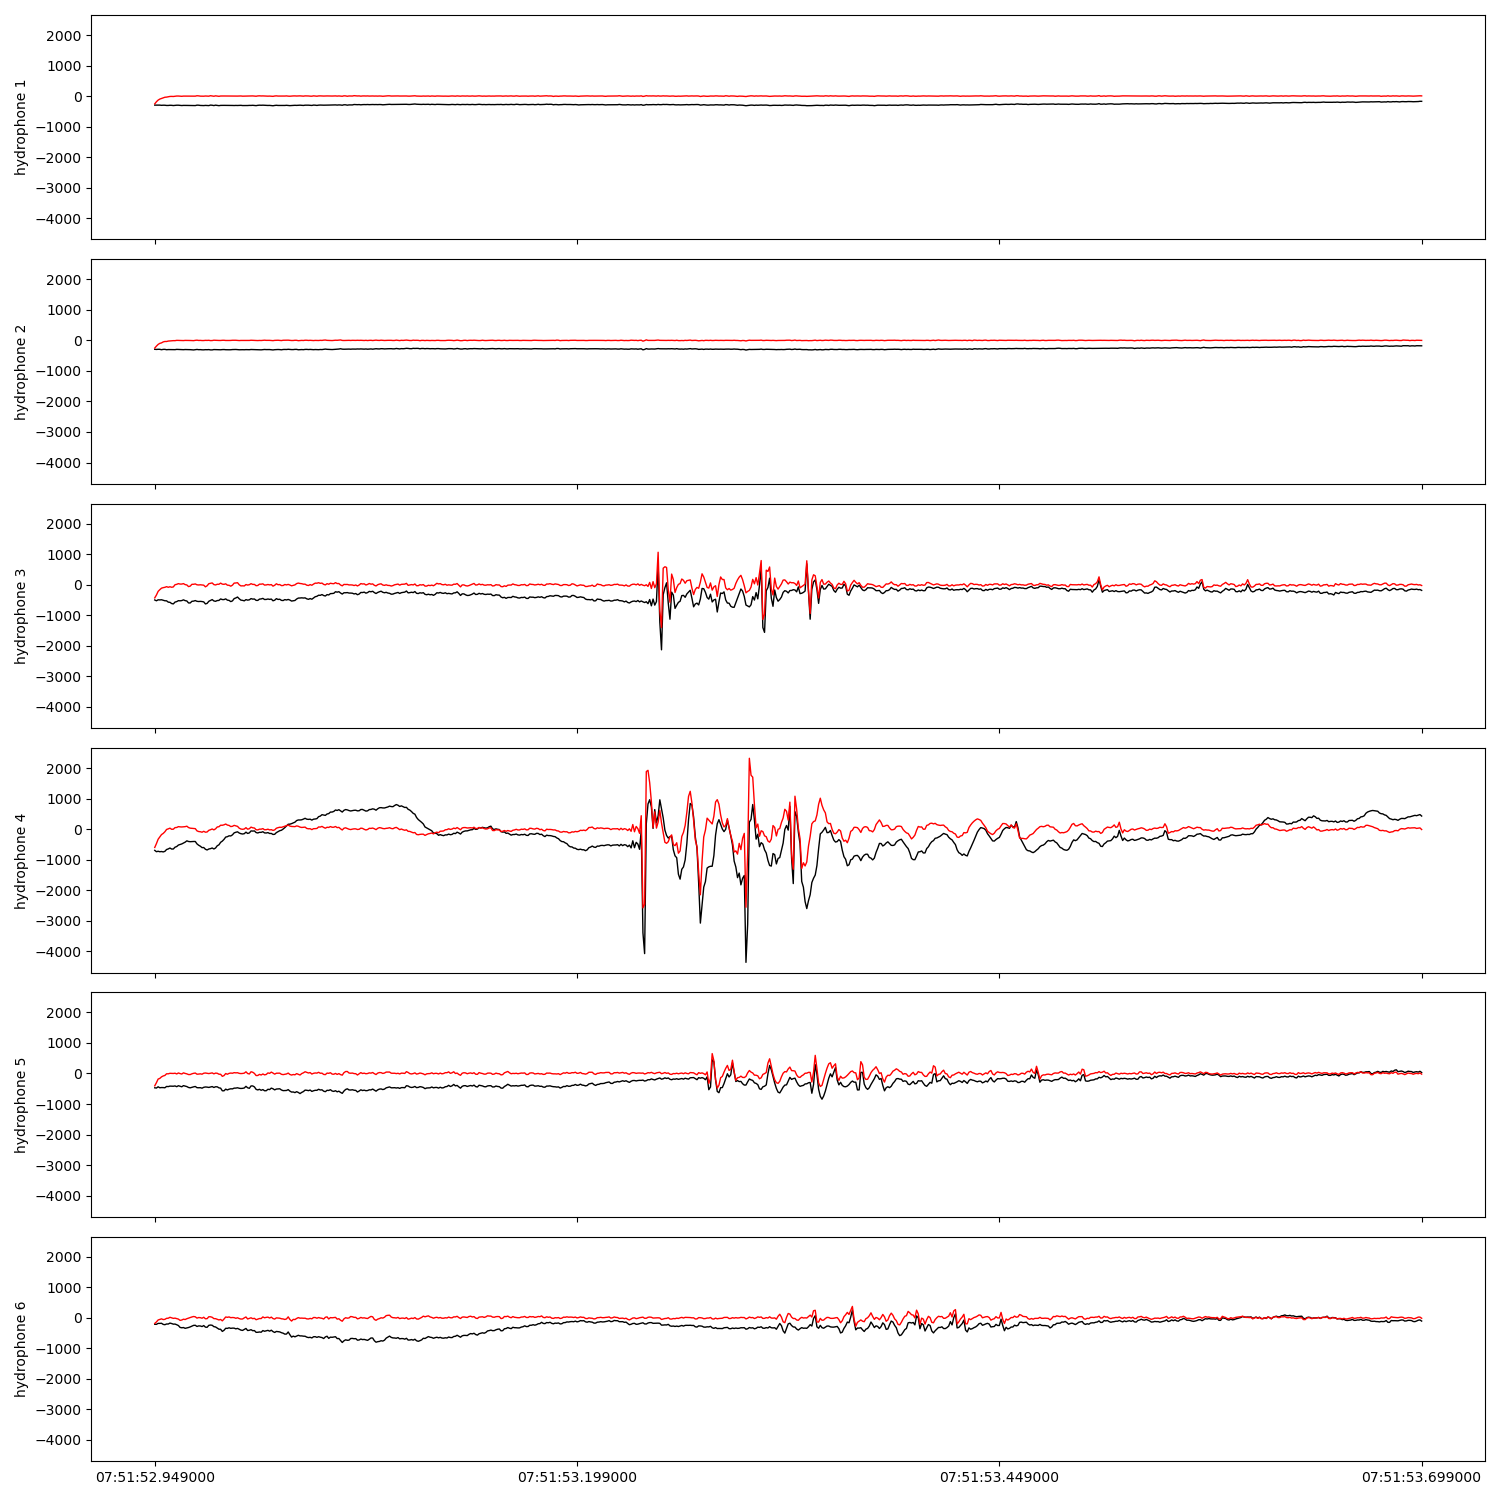

In [9]:
plot_raw_vs_50hz(eventtime=times[3], stream=stream)

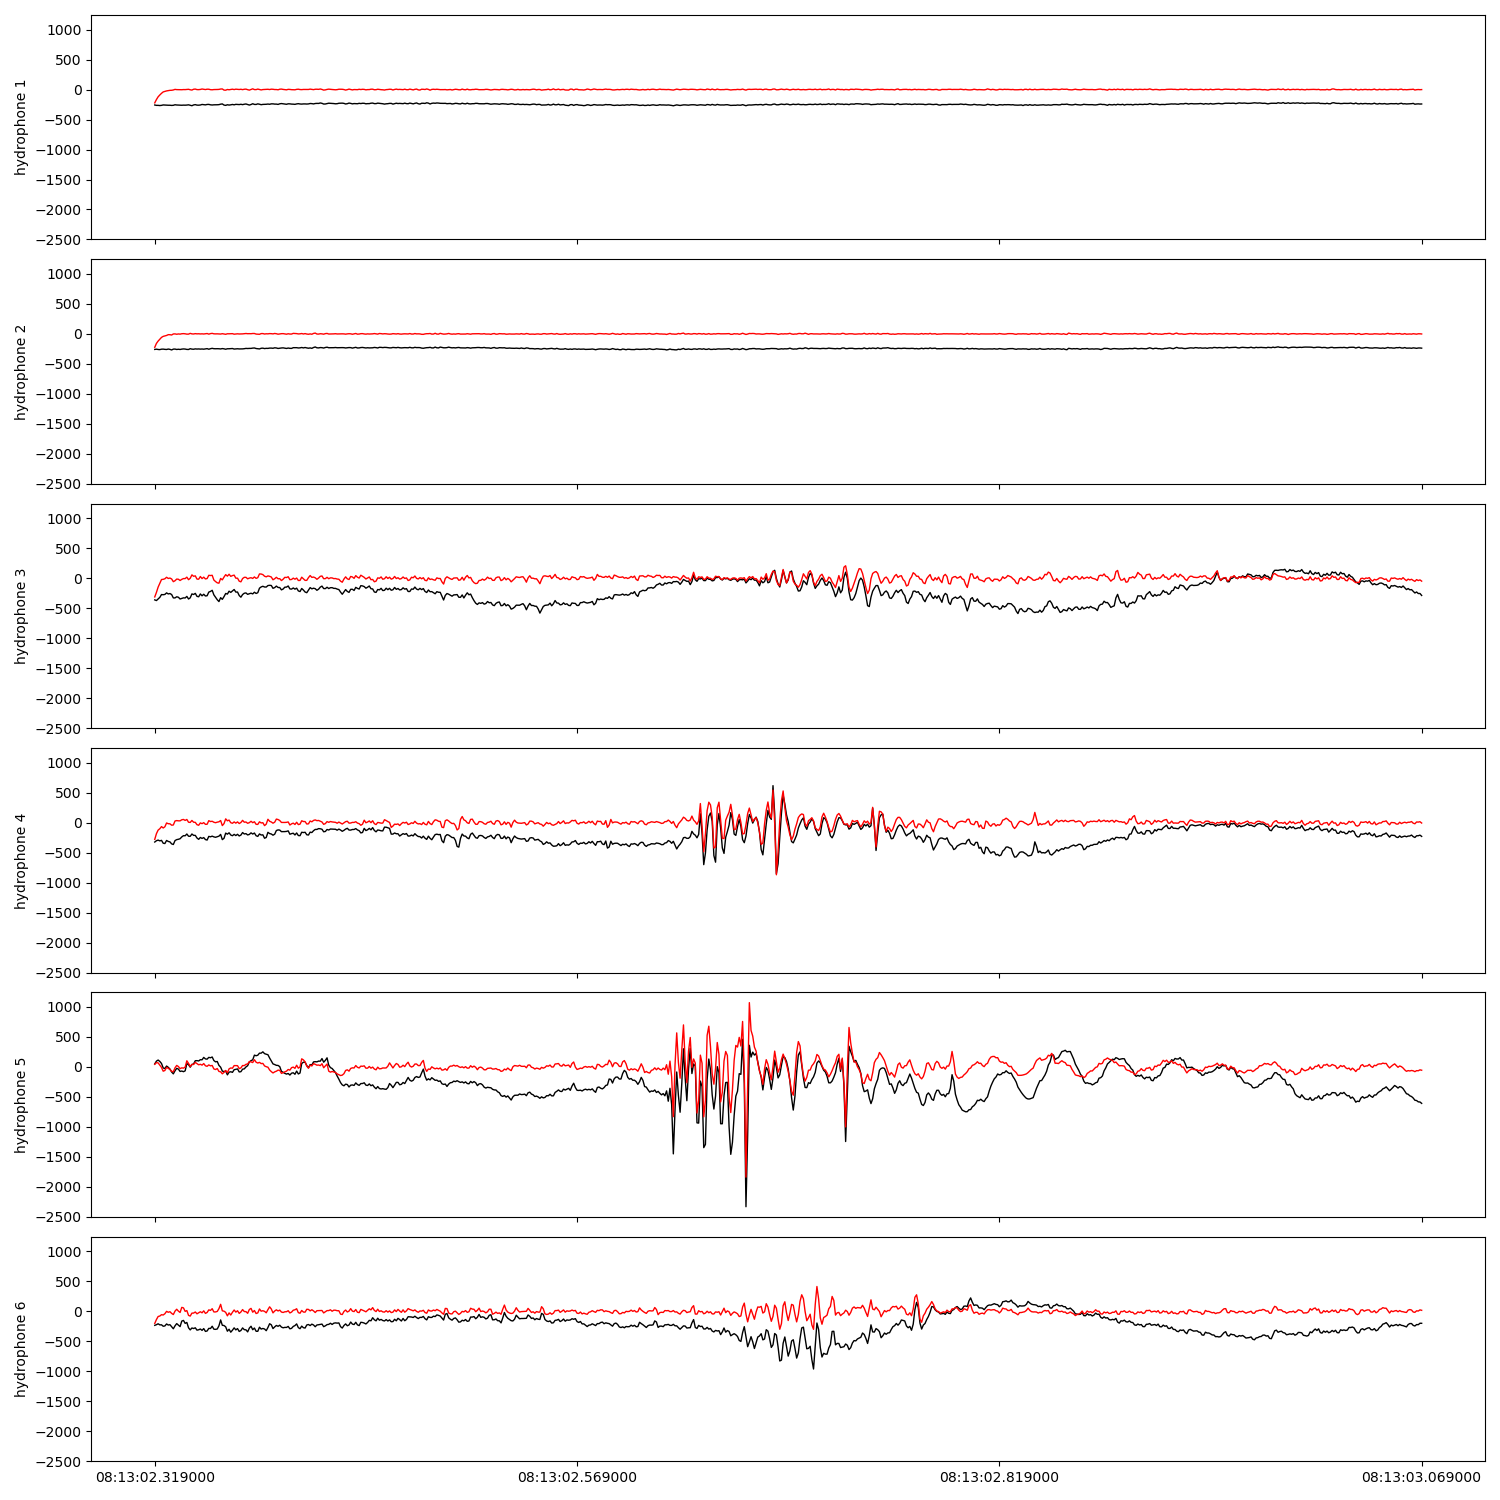

In [10]:
plot_raw_vs_50hz(eventtime=times[4], stream=stream)

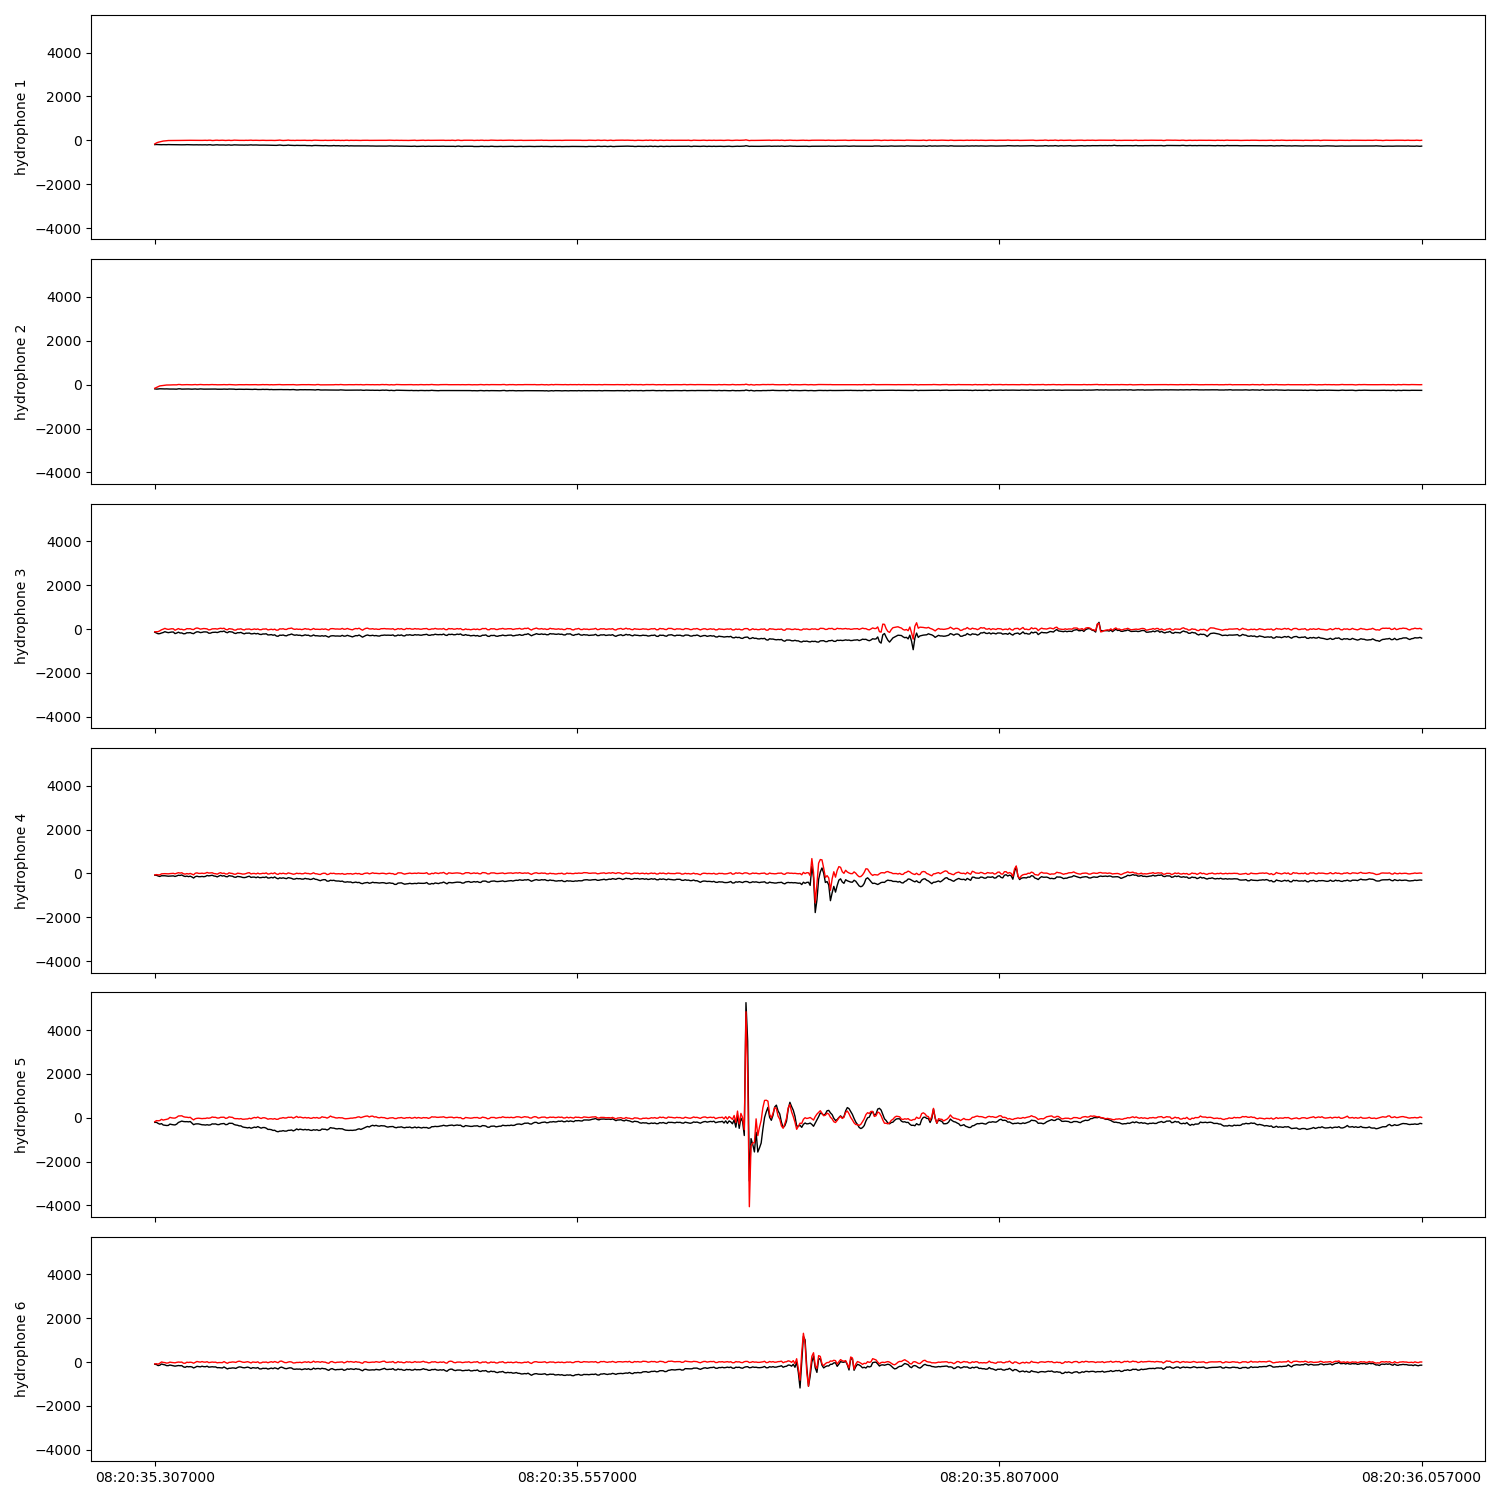

In [11]:
plot_raw_vs_50hz(eventtime=times[5], stream=stream)

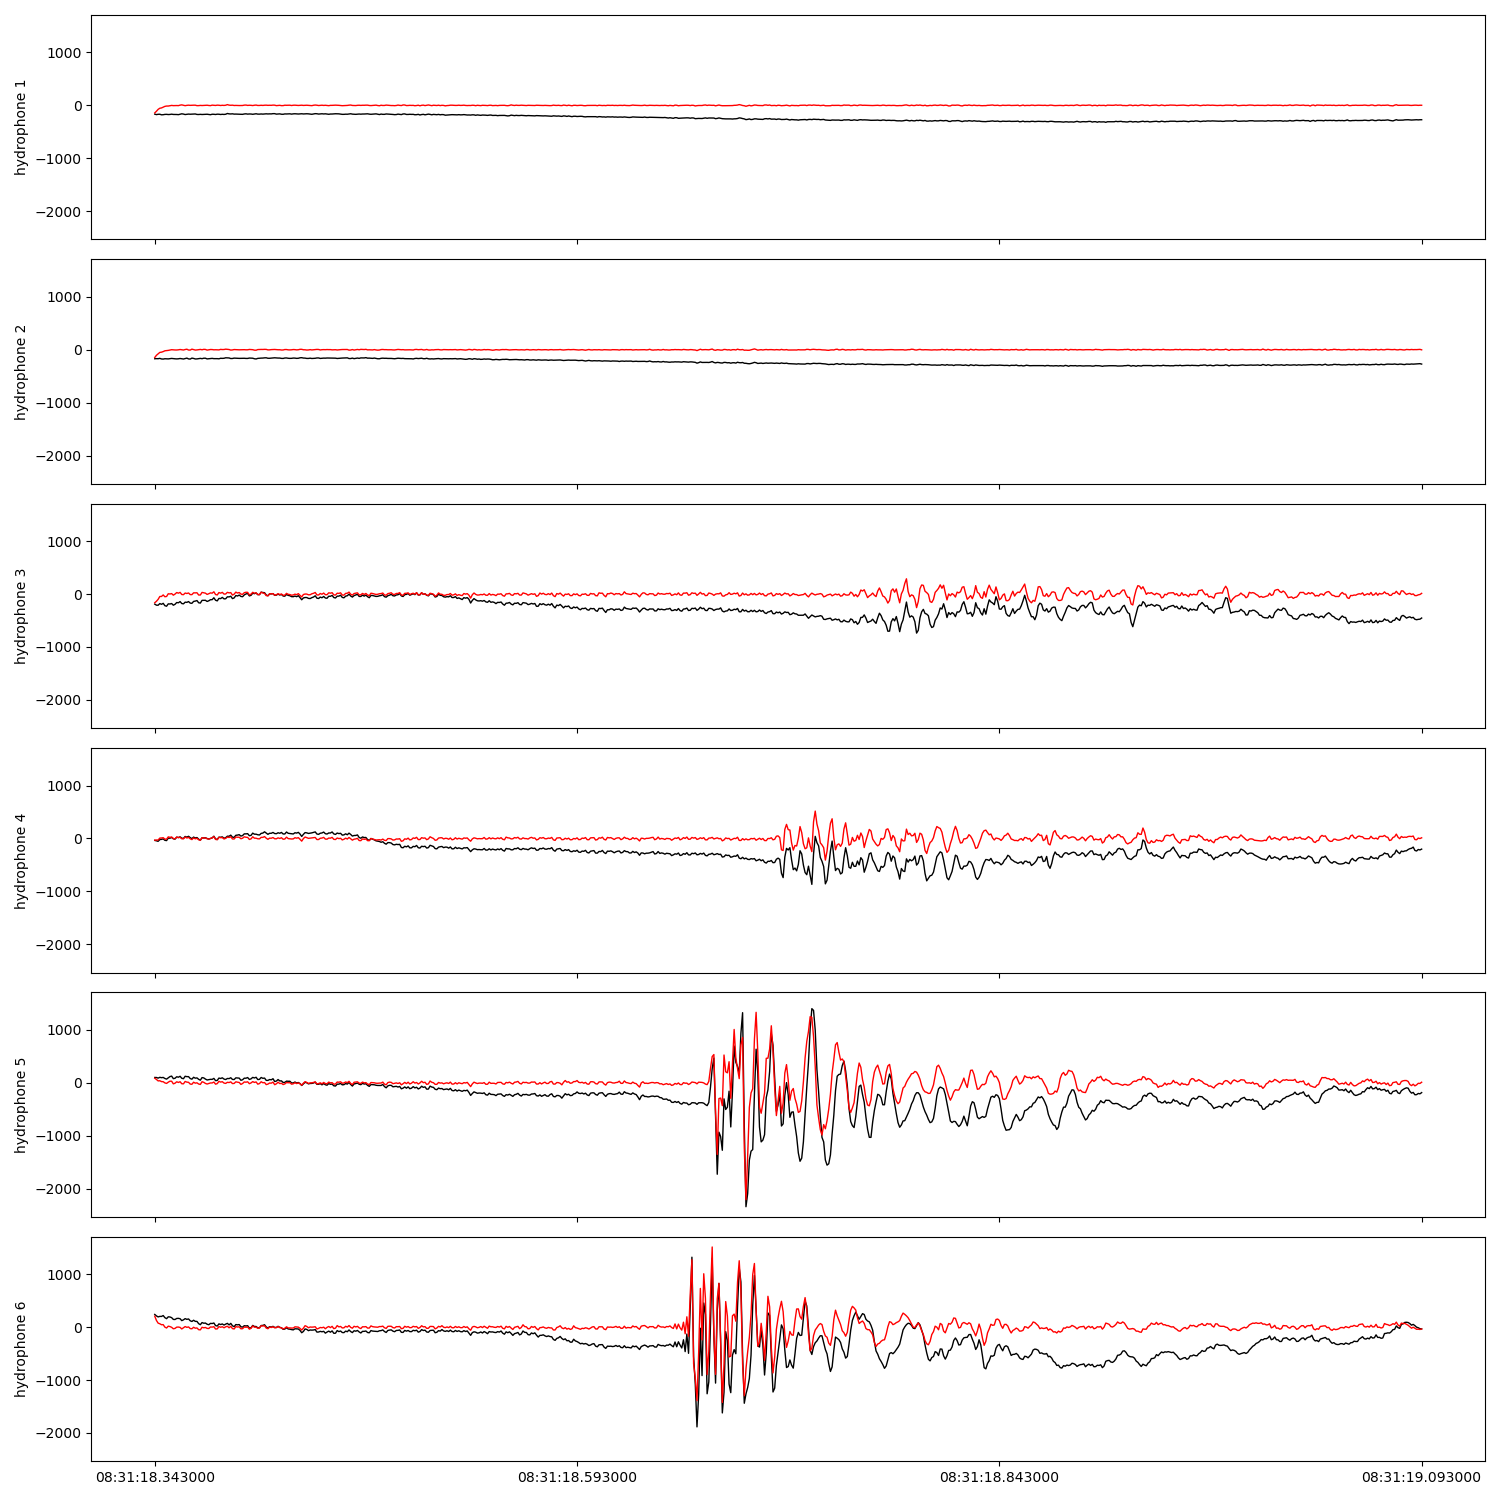

In [12]:
plot_raw_vs_50hz(eventtime=times[6], stream=stream)

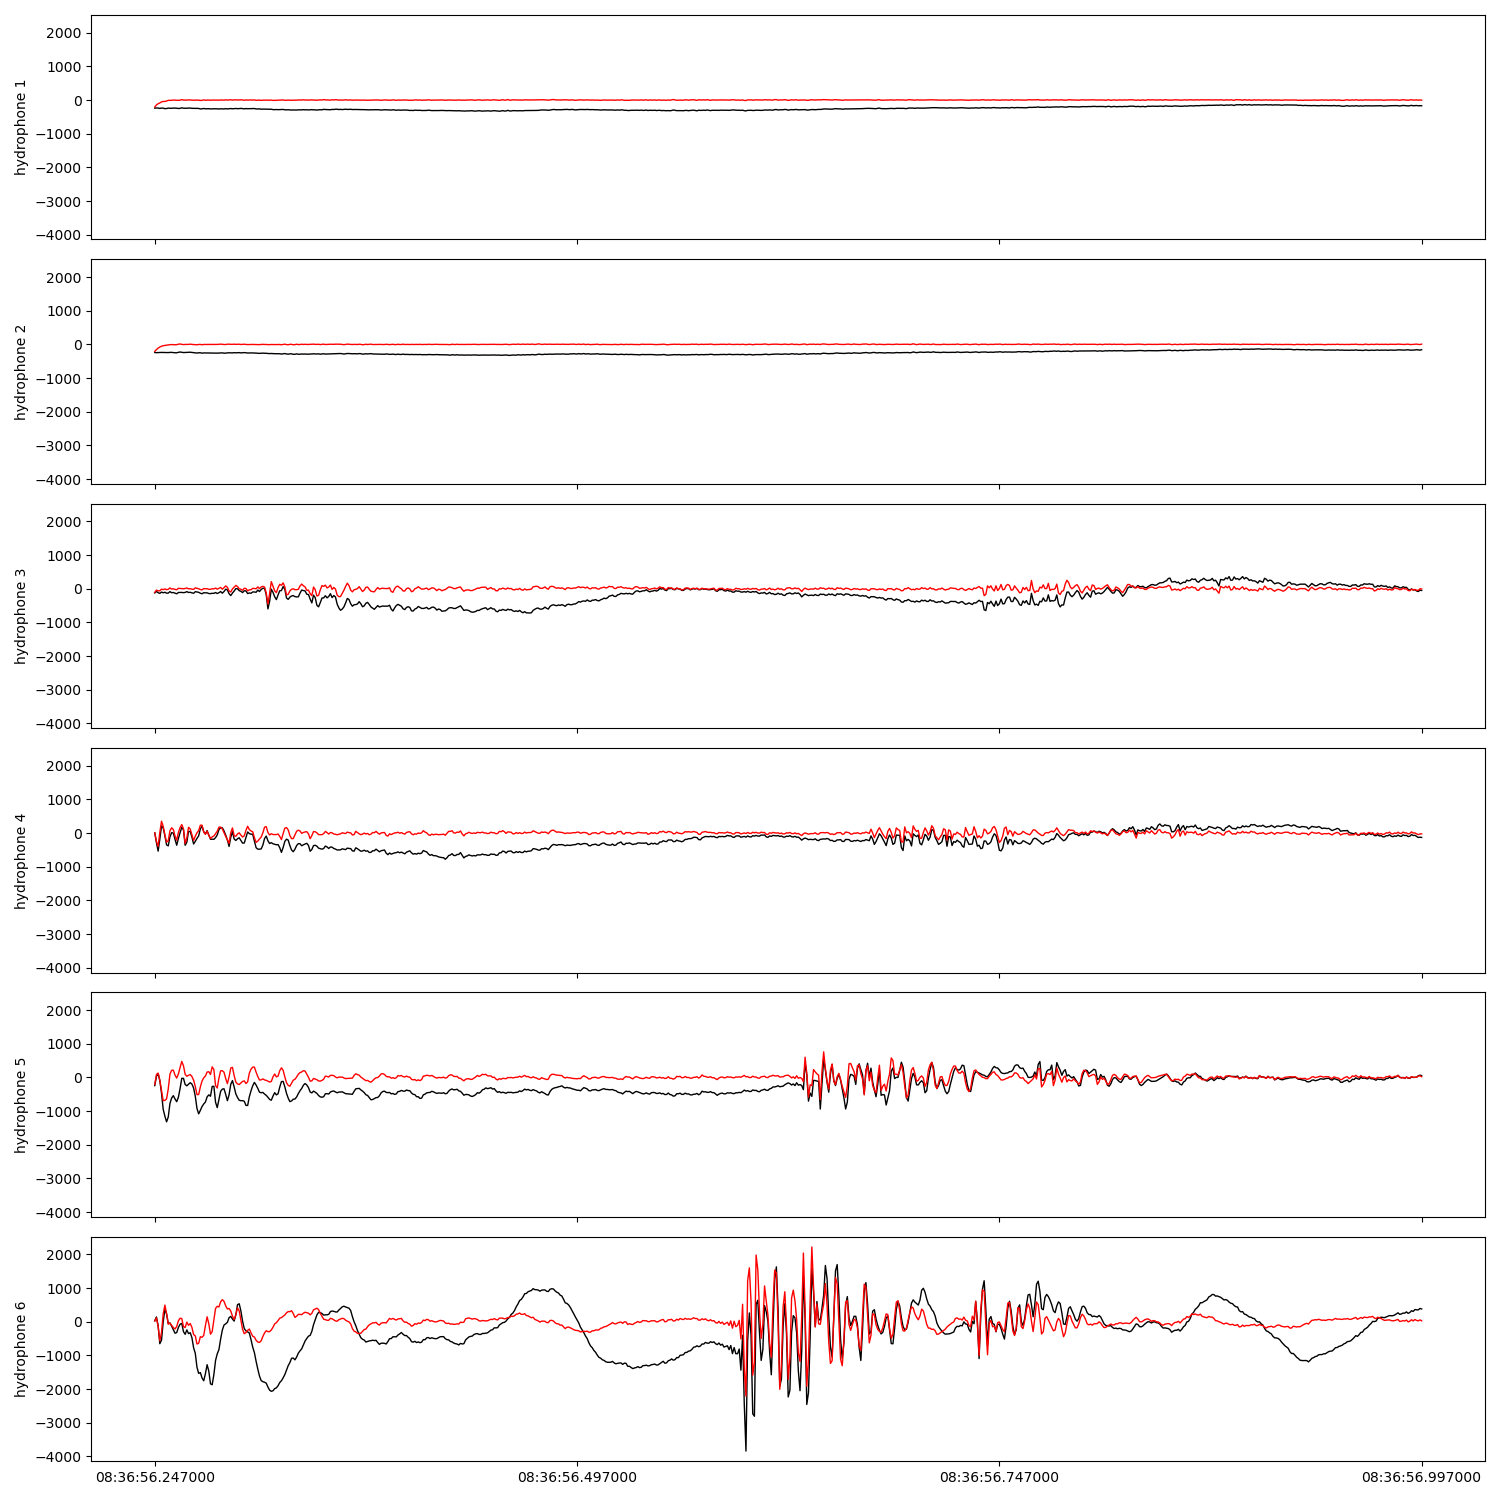

In [13]:
plot_raw_vs_50hz(eventtime=times[7], stream=stream)